## Example Argo data tutorial

### Argo float in the Tropical Pacific Ocean
The Tropical Pacific Ocean has a very strong thermocline, which can we mapped with Argo floats. 

In this tutorial, we show how to use Argo floats in the virtualship tool and how to analyse their data.

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

We have downloaded the data from Copernicus Marine Service, using `virtualship fetch` and the information in following `schedule.yaml` file:
```yaml
space_time_region:
  spatial_range:
    minimum_longitude: -5
    maximum_longitude: 5
    minimum_latitude: -5
    maximum_latitude: 5
    minimum_depth: 0
    maximum_depth: 2000
  time_range:
    start_time: 2023-01-01 00:00:00
    end_time: 2023-02-01 00:00:00
waypoints:
  - instrument: ARGO_FLOAT
    location:
      latitude: 0.02
      longitude: 0.02
    time: 2023-01-01 02:00:00
```

After running `virtualship run`, we have a `results/argo_floats.zarr` file with the data from the float.

In [2]:
ds = xr.open_zarr("/Users/erik/Desktop/VSC_Argo/results/argo_floats.zarr")

/Users/erik/anaconda3/envs/parcels/lib/python3.12/site-packages/xarray/coding/times.py:254: RuntimeWarning: invalid value encountered in cast
  flat_num_dates_ns_int = (flat_num_dates * _NS_PER_TIME_DELTA[delta]).astype(


We can now plot the trajectory of the float using the code below (copied from the [Parcels Argo float tutorial](https://docs.oceanparcels.org/en/latest/examples/tutorial_Argofloats.html)):

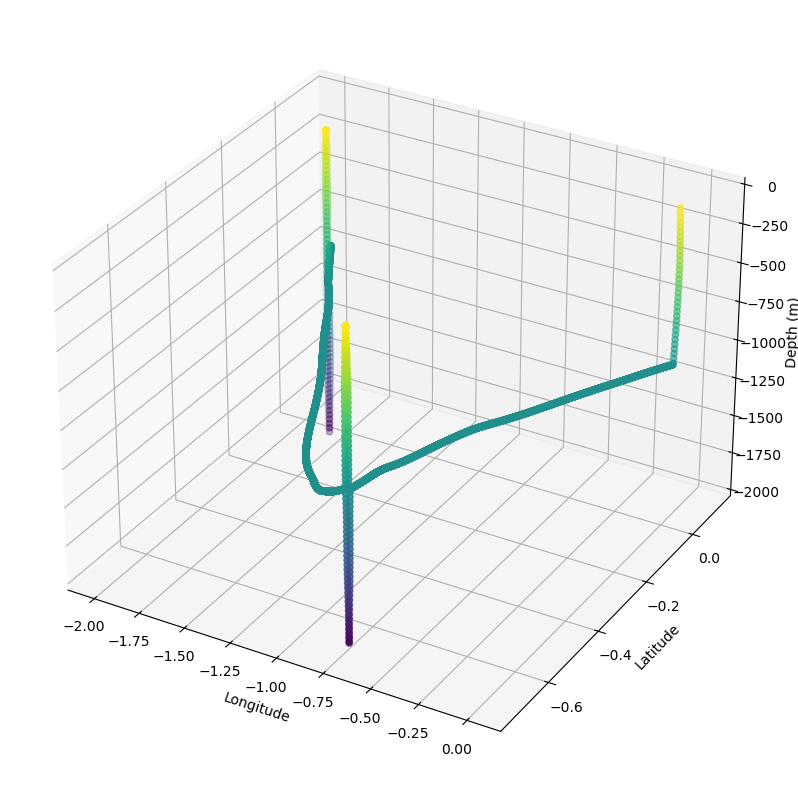

In [3]:
x = ds["lon"][:].squeeze()
y = ds["lat"][:].squeeze()
z = ds["z"][:].squeeze()

fig = plt.figure(figsize=(13, 10))
ax = plt.axes(projection="3d")
cb = ax.scatter(x, y, z, c=z, s=20, marker="o")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_zlabel("Depth (m)")
ax.set_zlim(-2000, 0)
plt.show()